In [36]:
import numpy as np
import matplotlib.pyplot as plt
import copy,math

In [37]:
x_train=np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])#features
y_train=np.array([460,232,178])# actual output

---

#calc predict

In [38]:
def calc_predict(x,w,b):
    if x.ndim == 1:
        return np.dot(x, w) + b
    else:
        m = x.shape[0]
        f_wb = np.zeros(m)
        for i in range(m):
            f_wb[i] = np.dot(x[i], w) + b
        return f_wb

In [39]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
a=x_train[0,:]
calc_predict(a,w_init,b_init)

np.float64(459.9999976194083)

---

#cost func

In [40]:
def compute_cost(x,y,w,b):
  m=x.shape[0]
  cost=0
  for i in range(m):
    f_wb=np.dot(x[i],w)+b
    cost+=(f_wb-y[i])**2
  return cost/(2*m)

In [41]:
compute_cost(x_train,y_train,w_init,b_init)

np.float64(1.5578904428966628e-12)

---

#gradient descent

In [ ]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        error = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += error * x[i][j]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
  j_history=[]
  w=copy.deepcopy(w_in)
  b=b_in
  for i in range(num_iters):
    dj_dw,dj_db=gradient_function(x,y,w,b)
    w-=alpha*dj_dw
    b-=alpha*dj_db
    if i<100000:
      j_history.append(cost_function(x,y,w,b))
      if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {j_history[-1]:8.2f}   ")
  return w,b,j_history

In [44]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7
w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init,b_init,
                                                      alpha, iterations, compute_cost, compute_gradient)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost     0.00   
Iteration  100: Cost     0.00   
Iteration  200: Cost     0.00   
Iteration  300: Cost     0.00   
Iteration  400: Cost     0.00   
Iteration  500: Cost     0.00   
Iteration  600: Cost     0.00   
Iteration  700: Cost     0.00   
Iteration  800: Cost     0.00   
Iteration  900: Cost     0.00   
b,w found by gradient descent: 785.18,[  0.39133535  18.75376741 -53.36032453 -26.42131618] 
prediction: 460.00, target value: 460
prediction: 232.00, target value: 232
prediction: 178.00, target value: 178


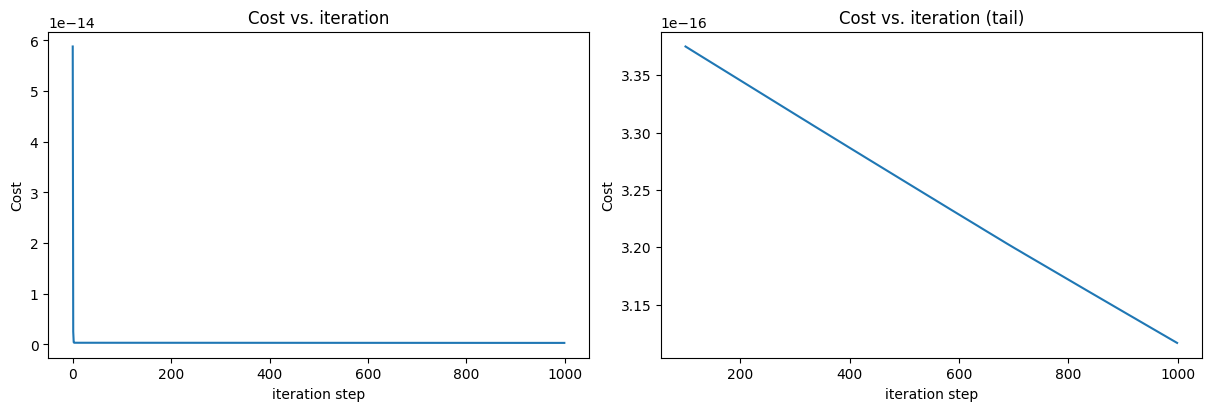

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()